In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
path1="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"

path2="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"

In [4]:
train_df = pd.read_csv(path1)
print("Training data", train_df.shape)
#print(train_df.head())
print(train_df['loan_status'].value_counts())

test_df = pd.read_csv(path2)
print("Testing data", test_df.shape)
#print(test_df.head())
print(test_df['loan_status'].value_counts())

df=pd.concat([train_df, test_df])  #right now the df is both training and testing data.
print("Data structure", df.shape)
#print(df.head(350))
df=df.reset_index(drop=True)  #Change the index to avoid future issue
#print(df.head(350))
print(df['loan_status'].value_counts())

Training data (346, 10)
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64
Testing data (54, 10)
PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64
Data structure (400, 10)
PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64


In [5]:
df.shape

(400, 10)

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Data Visualization and Pre-processing

In [7]:
df['loan_status'].value_counts()
df.Principal.min()
np.linspace(df['Principal'].min(), df.Principal.max(), 10)
#df['Principal'].value_counts()

array([ 300.        ,  377.77777778,  455.55555556,  533.33333333,
        611.11111111,  688.88888889,  766.66666667,  844.44444444,
        922.22222222, 1000.        ])

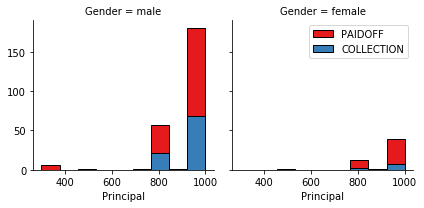

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

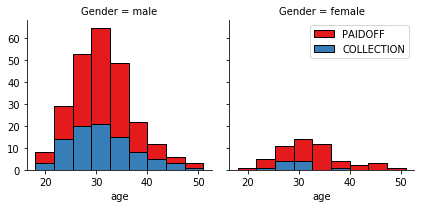

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Look at the day of week people get loan

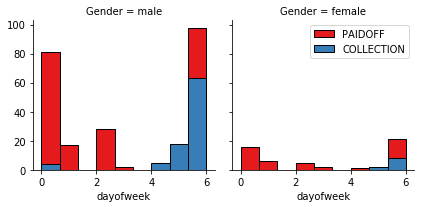

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
# Create weekend variable
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

In [15]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
#Feature.loc[Feature['Master or Above']==1]  #Retrieve rows based on column value


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
X = Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.34185798, -0.43236977,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896]])

In [22]:
#Split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Train data set", X_train.shape)
print("Test data set", X_test.shape)

Train data set (320, 8)
Test data set (80, 8)


KNN model and choose the best K

In [23]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print(mean_acc)
K=mean_acc.argmax()+1
print(K)

The best accuracy was with 0.7875 with k= 5
[0.7125 0.65   0.775  0.7625 0.7875 0.725  0.7375 0.65   0.7375]
5


In [24]:
KNNOB=KNeighborsClassifier(n_neighbors=K)
KNNOB.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
DTOB=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTOB.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Support Vector Machine

In [26]:
from sklearn import svm
SVMOB=svm.SVC(kernel='rbf')

In [28]:
SVMOB.fit(X_train,y_train)

C:\Users\Lanlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
from sklearn.linear_model import LogisticRegression
LROB=LogisticRegression()
LROB.fit(X_train,y_train)

C:\Users\Lanlan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [31]:
y1hat=KNNOB.predict(X_test)
y2hat=DTOB.predict(X_test)
y3hat=SVMOB.predict(X_test)
y4hat=LROB.predict(X_test)

In [32]:
print("KNN Jaccard Score",  jaccard_similarity_score(y_test, y1hat))
print("Decision Tree Jaccard Score",  jaccard_similarity_score(y_test,y2hat))
print("SVM Jaccard Score",  jaccard_similarity_score(y_test,y3hat))
print("Logistic Regression Jaccard Score",  jaccard_similarity_score(y_test,y4hat))

KNN Jaccard Score 0.7875
Decision Tree Jaccard Score 0.7875
SVM Jaccard Score 0.7875
Logistic Regression Jaccard Score 0.775


In [33]:
print("KNN F1 Score",  f1_score(y_test,y1hat,average='weighted'))
print("Decision Tree F1 Score",  f1_score(y_test,y2hat,average='weighted'))
print("SVM F1 Score",  f1_score(y_test,y3hat,average='weighted'))
print("Logistic Regression F1 Score",  f1_score(y_test,y4hat,average='weighted'))

y4hat_prob = LROB.predict_proba(X_test)
print("Logistic Regression Log Loss Score",  log_loss(y_test, y4hat_prob))
from sklearn.metrics import classification_report,roc_auc_score
print("Logistic Regression Classification report\n",classification_report(y_test, yhat))


KNN F1 Score 0.7896857142857143
Decision Tree F1 Score 0.7316632408359027
SVM F1 Score 0.7563333333333333
Logistic Regression F1 Score 0.7363970588235295
Logistic Regression Log Loss Score 0.46740989459296206
Logistic Regression Classification report
               precision    recall  f1-score   support

  COLLECTION       0.39      0.41      0.40        17
     PAIDOFF       0.84      0.83      0.83        63

   micro avg       0.74      0.74      0.74        80
   macro avg       0.61      0.62      0.62        80
weighted avg       0.74      0.74      0.74        80

